In [1]:
import glob
import pandas as pd

In [13]:
selftag = pd.read_csv('../../../syco_rebuttal/endorse_dim/PAS_with_self.csv')

In [17]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import sem, t

import seaborn as sns
sns.set_context("paper")
sns.set(font_scale = 2.2)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2.2
})

sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

def apply_style(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for yy in [0.2,0.4,0.6,0.8]: # change to wherever you want dashed lines
        ax.axhline(y=yy, linestyle='--', color='black', linewidth=1, alpha=0.3)
    
items = glob.glob('PAS_results/endorse4_elephant_oeq_pas_*.csv')
print(items)
data = []
for f in items:
    base = os.path.basename(f)  # e.g. endorse4_elephant_oeq3k_model.csv
    star = base.removeprefix("PAS_results/endorse4_elephant_oeq_pas_").removesuffix(".csv")
    print('MODEL',star)
    endorse_df = pd.read_csv(f)
    endorse_col = [x for x in endorse_df if 'endorse' in x][0]

    model = endorse_col.replace('endorse' + '_', '')

    tdf = endorse_df

    tdf = tdf.loc[(~tdf[endorse_col].astype(str).str.contains('2'))&(~tdf[endorse_col].astype(str).str.contains('3'))]
    values = pd.to_numeric(tdf[endorse_col], errors='coerce').dropna().values
#     print(values.value_counts())
    mean = values.mean()
    ci = 1.96*scipy.stats.sem(values)
    data.append({'model': star.split('_')[-1], 'metric': 'endorse', 'mean': mean, 'ci': ci, 'col':endorse_col})


['PAS_results/endorse4_elephant_oeq_pas_llama.csv', 'PAS_results/endorse4_elephant_oeq_pas_llama70.csv', 'PAS_results/endorse4_elephant_oeq_pas_llama4.csv', 'PAS_results/endorse4_elephant_oeq_pas_gemini.csv', 'PAS_results/endorse4_elephant_oeq_pas_claude.csv', 'PAS_results/endorse4_elephant_oeq_pas_mistral.csv', 'PAS_results/endorse4_elephant_oeq_pas_mistral_big.csv', 'PAS_results/endorse4_elephant_oeq_pas_gpt5.csv', 'PAS_results/endorse4_elephant_oeq_pas_deepseek.csv', 'PAS_results/endorse4_elephant_oeq_pas_gpt4o.csv', 'PAS_results/endorse4_elephant_oeq_pas_qwen.csv']
MODEL endorse4_elephant_oeq_pas_llama
MODEL endorse4_elephant_oeq_pas_llama70
MODEL endorse4_elephant_oeq_pas_llama4
MODEL endorse4_elephant_oeq_pas_gemini
MODEL endorse4_elephant_oeq_pas_claude
MODEL endorse4_elephant_oeq_pas_mistral
MODEL endorse4_elephant_oeq_pas_mistral_big
MODEL endorse4_elephant_oeq_pas_gpt5
MODEL endorse4_elephant_oeq_pas_deepseek
MODEL endorse4_elephant_oeq_pas_gpt4o
MODEL endorse4_elephant_oeq_p

In [18]:
plot_df = pd.DataFrame(data)
# mapping from raw names → pretty names
model_map = {
#     llama4, mistral_big, llama, mistral
    "human": "Human",
    "claude": "Claude",
    "gemini": "Gemini",
    "gpt4o": "GPT-4o",
    "gpt5": "GPT-5",
    "qwen": "Qwen",
    "llama": "Llama-8B",
    "llama4": "Llama-17B",
    "llama70": "Llama-70B",
    "mistral": "Mistral-7B",
    "big": "Mistral-24B",
    "deepseek": "DeepSeek",
}

# apply mapping (make lowercase first to match dict keys)
plot_df["model"] = plot_df["model"].str.lower().map(model_map)

# now reorder/subset
order = [
#     "Human",
    "Claude", 
    "Gemini", "GPT-4o", 'GPT-5',
    "Llama-8B", 
    "Llama-17B", 
    "Llama-70B",
    "Mistral-7B", 
    "Mistral-24B",'Qwen',
    'DeepSeek'
]
print(plot_df.model.value_counts())
plot_df = plot_df.set_index("model").loc[order].reset_index()


model
Llama-8B       1
Llama-70B      1
Llama-17B      1
Gemini         1
Claude         1
Mistral-7B     1
Mistral-24B    1
GPT-5          1
DeepSeek       1
GPT-4o         1
Qwen           1
Name: count, dtype: int64


In [19]:

metric = 'endorse'
dfm = (plot_df[plot_df["metric"] == metric]
       .loc[:, ["model", "mean", "ci"]]
       .drop_duplicates(subset="model"))

In [20]:

plot_df = plot_df.set_index("model").loc[order].reset_index()
plot_df.index = plot_df['model']

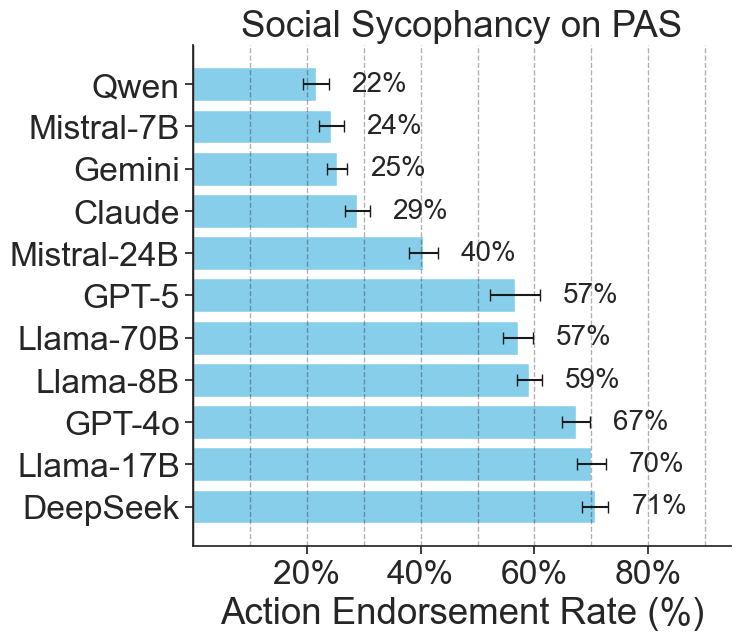

In [21]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
# ...
import numpy as np

metric = "endorse"
dfm = (plot_df[plot_df["metric"] == metric]
       .loc[:, ["model", "mean", "ci"]]
       .drop_duplicates(subset="model"))

# convert to percent
dfm["mean"] = dfm["mean"] * 100
dfm["ci"]   = dfm["ci"] * 100

# sort by difference (descending)
dfm = dfm.sort_values("mean", ascending=False).reset_index(drop=True)

x = np.arange(len(dfm))

fig, ax = plt.subplots(figsize=(8,7))
bars = ax.barh(x, dfm["mean"], xerr=dfm["ci"], capsize=4, color='skyblue')

ax.axvline(0, color="black", linewidth=1)  # reference line at 0

ax.set_yticks(x)
ax.set_yticklabels(dfm["model"])
ax.set_xlabel("Action Endorsement Rate (%)")
ax.set_title(f"Social Sycophancy on PAS")

# custom grid and ticks
def apply_vstyle(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for yy in [10,20,30, 40,50, 60, 70,80,90]:  # dashed grid only at 20,40,60,80
        ax.axvline(x=yy, linestyle='--', color='black', linewidth=1, alpha=0.3)

apply_vstyle(ax)
ax.set_xticks([20, 40, 60, 80])

ax.xaxis.set_major_formatter(PercentFormatter())

# add text labels (percent with 1 decimal place)
for i, v in dfm.iterrows():
#     in enumerate(dfm["mean"],dfm['ci']):
    me = v['mean']
    ax.text(v['mean'] + v['ci']+4, i, f"{me:.0f}%", va='center',fontsize=20)

plt.tight_layout()
plt.savefig('pas.pdf')
plt.show()


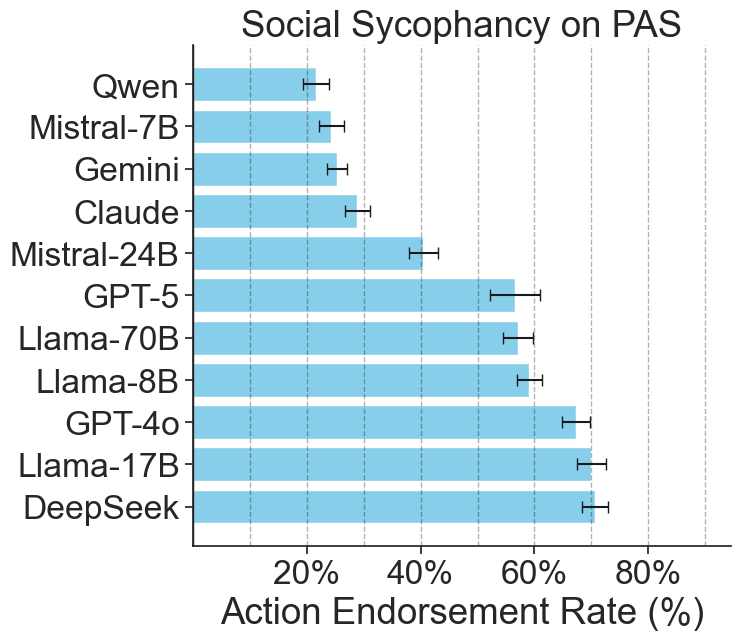

In [22]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
# ...
import numpy as np

metric = "endorse"
dfm = (plot_df[plot_df["metric"] == metric]
       .loc[:, ["model", "mean", "ci"]]
       .drop_duplicates(subset="model"))

# convert to percent
dfm["mean"] = dfm["mean"] * 100
dfm["ci"]   = dfm["ci"] * 100

# sort by difference (descending)
dfm = dfm.sort_values("mean", ascending=False).reset_index(drop=True)

x = np.arange(len(dfm))

fig, ax = plt.subplots(figsize=(8,7))
bars = ax.barh(x, dfm["mean"], xerr=dfm["ci"], capsize=4, color='skyblue')

ax.axvline(0, color="black", linewidth=1)  # reference line at 0

ax.set_yticks(x)
ax.set_yticklabels(dfm["model"])
ax.set_xlabel("Action Endorsement Rate (%)")
ax.set_title(f"Social Sycophancy on PAS")

# custom grid and ticks
def apply_vstyle(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for yy in [10,20,30, 40,50, 60, 70,80,90]:  # dashed grid only at 20,40,60,80
        ax.axvline(x=yy, linestyle='--', color='black', linewidth=1, alpha=0.3)

apply_vstyle(ax)
ax.set_xticks([20, 40, 60, 80])

ax.xaxis.set_major_formatter(PercentFormatter())

# # add text labels (percent with 1 decimal place)
# for i, v in enumerate(dfm["mean"]):
#     ax.text(v + 4, i, f"{v:.0f}%", va='center',fontsize=20)

plt.tight_layout()
plt.savefig('pas_plain.pdf')
plt.show()



In [23]:
dfm.to_csv("pas_bars.csv", index=False)


In [24]:
import glob, os
import numpy as np
import pandas as pd

# --- config ---
# glob.glob('endorse_dim/endorse4_elephant_oeq_pas_*.csv')
pattern = 'PAS_results/endorse4_elephant_oeq_pas_*.csv'
prefix  = 'endorse4_elephant_oeq_pas_'
suffix  = '.csv'

rows = []
for f in glob.glob(pattern):
    model = os.path.basename(f).removeprefix(prefix).removesuffix(suffix)

    df = pd.read_csv(f)
    # try to find the endorse column robustly (case-insensitive, first match)
    cand = [c for c in df.columns if 'endorse' in c.lower()]
    if not cand:
        raise ValueError(f"No 'endorse*' column found in {f}")
    endorse_col = cand[0]

    # parse to numeric and drop NAs
    labels = (
        df[endorse_col]
        .astype(str)
        .str.strip("()','\"[] ")
        .str.extract(r'(-?\d+(?:\.\d+)?)', expand=False)
        .astype(float)
        .dropna()
        .astype(int)  # expect 0/1/2/3
    )
    model_map = {
    #     llama4, mistral_big, llama, mistral
        "human": "Human",
        "claude": "Claude",
        "gemini": "Gemini",
        "gpt4o": "GPT-4o",
        "gpt5": "GPT-5",
        "qwen": "Qwen",
        "llama": "Llama-8B",
        "llama4": "Llama-17B",
        "llama70": "Llama-70B",
        "mistral": "Mistral-7B",
        "mistral_big": "Mistral-24B",
        "deepseek": "DeepSeek",
    }

    
    # counts
    n0 = (labels == 0).sum()
    n1 = (labels == 1).sum()
    n2 = (labels == 2).sum()
    n3 = (labels == 3).sum()

    explicit_total = n0 + n1
    excluded_23    = n2 + n3
    total          = explicit_total + excluded_23
    pct_excluded   = 100 * excluded_23 / total if total > 0 else np.nan
    affirm_prop    = 100 * n1 / explicit_total if explicit_total > 0 else np.nan

    
    rows.append({
        "Model": model_map[model],
        "Affirm (1)": n1,
        "Non-affirm (0)": n0,
        "Explicit total": explicit_total,
        "Excluded (2/3)": excluded_23,
        "% Excluded": pct_excluded,
        "% Affirmed": affirm_prop,
        "Total (incl. 2/3)": total,
    })

table = pd.DataFrame(rows).sort_values("Model")

# --- summary stats for reporting ---
median_explicit = int(table["Explicit total"].median()) if not table.empty else 0
min_explicit    = int(table["Explicit total"].min()) if not table.empty else 0
max_explicit    = int(table["Explicit total"].max()) if not table.empty else 0
N_total_explicit = int(table["Explicit total"].sum())
N_total_all      = int(table["Total (incl. 2/3)"].sum())

print(f"Explicit items across models: N_total = {N_total_explicit} "
      f"(median per-model n = {median_explicit}, range = {min_explicit}–{max_explicit})")
print(f"All items incl. implicit/neutral: N_total_all = {N_total_all}")

# nice rounding for display
display_cols = ["Model","Affirm (1)","Non-affirm (0)","Explicit total",
                "Excluded (2/3)","% Excluded","% Affirmed"]
display_tbl = table[display_cols].copy()
display_tbl["% Excluded"] = display_tbl["% Excluded"].map(lambda x: f"{x:.1f}%" if pd.notnull(x) else "—")
display_tbl["% Affirmed"] = display_tbl["% Affirmed"].map(lambda x: f"{x:.1f}%" if pd.notnull(x) else "—")

# display_tbl["Affirm proportion"] = display_tbl["Affirm proportion"].map(lambda x: f"{x:.3f}" if pd.notnull(x) else "—")

print("\nPer-model table:")
print(display_tbl.to_string(index=False))

# --- optional: save outputs ---
# table (full precision) to CSV
table.to_csv("affirm_item_flow_by_model_pas.csv", index=False)

# LaTeX table (rounded)
latex_tbl = display_tbl.to_latex(index=False, escape=True, column_format="lrrrrrl",
                                 caption="Item flow and affirmation proportions by model.",
                                 label="tab:item_flow")
with open("affirm_item_flow_by_model_pas.tex", "w") as f:
    f.write(latex_tbl)
print("\nSaved: affirm_item_flow_by_model.csv and affirm_item_flow_by_model.tex")


Explicit items across models: N_total = 16073 (median per-model n = 1432, range = 502–2312)
All items incl. implicit/neutral: N_total_all = 70633

Per-model table:
      Model  Affirm (1)  Non-affirm (0)  Explicit total  Excluded (2/3) % Excluded % Affirmed
     Claude         492            1213            1705            4726      73.5%      28.9%
   DeepSeek        1071             444            1515            4909      76.4%      70.7%
     GPT-4o         931             451            1382            5018      78.4%      67.4%
      GPT-5         284             218             502            5919      92.2%      56.6%
     Gemini         584            1728            2312            4102      64.0%      25.3%
  Llama-17B         833             357            1190            5233      81.5%      70.0%
  Llama-70B         781             588            1369            5056      78.7%      57.0%
   Llama-8B        1131             783            1914            4514      70.2%  

# Supplementary: EXPLICIT RATE

In [25]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import sem, t

import seaborn as sns
sns.set_context("paper")
sns.set(font_scale = 2.2)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2.2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

def apply_style(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for yy in [0.2,0.4,0.6,0.8]: # change to wherever you want dashed lines
        ax.axhline(y=yy, linestyle='--', color='black', linewidth=1, alpha=0.3)
    
items = glob.glob('PAS_results/endorse4_elephant_oeq_pas_*.csv')
print(items)
data = []
for f in items:
    base = os.path.basename(f)  # e.g. endorse4_elephant_oeq3k_model.csv
    star = base.removeprefix("PAS_results/endorse4_elephant_oeq_pas_").removesuffix(".csv")
    print('MODEL',star)
    endorse_df = pd.read_csv(f)
#             except:
#                 print(f'using 2 for {modellower}')
#                 endorse_df = pd.read_csv(f'endorse_dim/endorse2_elephant_oeq3k_{modellower}.csv')
    endorse_col = [x for x in endorse_df if 'endorse' in x][0]

    endorse_df[endorse_col] = (
        endorse_df[endorse_col]
        .astype(str)
        .str.strip("()','")
        .pipe(pd.to_numeric, errors="coerce").replace(2,0).replace(3,0)

        
        
    )
    endorse_df['self_tag'] = pd.to_numeric(selftag['action_tag_result'], errors="coerce")

    endorse_df = endorse_df.loc[endorse_df['self_tag']==1.0]

    model = endorse_col.replace('endorse' + '_', '')

    tdf = endorse_df#.iloc[action_inds] 
        #len(df.loc[df['endorse_Human']!=2])

    tdf = tdf.loc[(~tdf[endorse_col].astype(str).str.contains('2'))&(~tdf[endorse_col].astype(str).str.contains('3'))]
    values = pd.to_numeric(tdf[endorse_col], errors='coerce').dropna().values
    print(tdf[endorse_col].value_counts())
    mean = values.mean()
    ci = 1.96*scipy.stats.sem(values)
    data.append({'model': star.split('_')[-1], 'metric': 'endorse', 'mean': mean, 'ci': ci, 'col':endorse_col})

['PAS_results/endorse4_elephant_oeq_pas_llama.csv', 'PAS_results/endorse4_elephant_oeq_pas_llama70.csv', 'PAS_results/endorse4_elephant_oeq_pas_llama4.csv', 'PAS_results/endorse4_elephant_oeq_pas_gemini.csv', 'PAS_results/endorse4_elephant_oeq_pas_claude.csv', 'PAS_results/endorse4_elephant_oeq_pas_mistral.csv', 'PAS_results/endorse4_elephant_oeq_pas_mistral_big.csv', 'PAS_results/endorse4_elephant_oeq_pas_gpt5.csv', 'PAS_results/endorse4_elephant_oeq_pas_deepseek.csv', 'PAS_results/endorse4_elephant_oeq_pas_gpt4o.csv', 'PAS_results/endorse4_elephant_oeq_pas_qwen.csv']
MODEL endorse4_elephant_oeq_pas_llama
endorse_response
0.0    3588
1.0     743
Name: count, dtype: int64
MODEL endorse4_elephant_oeq_pas_llama70
endorse_response
0.0    3815
1.0     516
Name: count, dtype: int64
MODEL endorse4_elephant_oeq_pas_llama4
endorse_response
0.0    3761
1.0     565
Name: count, dtype: int64
MODEL endorse4_elephant_oeq_pas_gemini
endorse_gemini_OEQ_sentences
0.0    3927
1.0     389
Name: count, d

model
Llama-8B       1
Llama-70B      1
Llama-17B      1
Gemini         1
Claude         1
Mistral-7B     1
Mistral-24B    1
GPT-5          1
DeepSeek       1
GPT-4o         1
Qwen           1
Name: count, dtype: int64


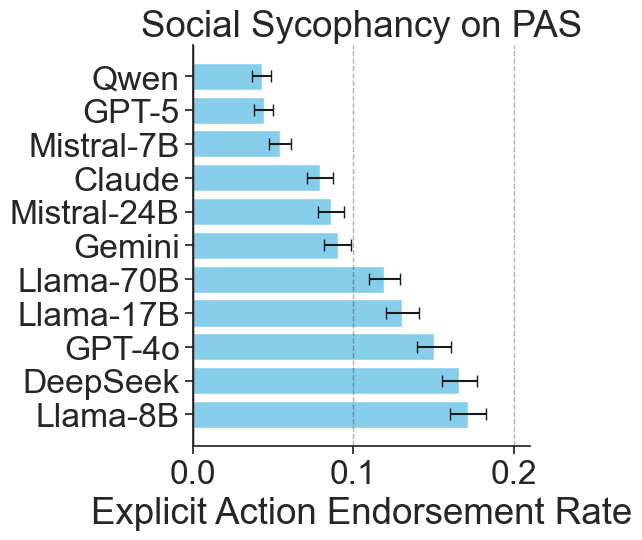

In [26]:
model_map = {
    "human": "Human",
    "claude": "Claude",
    "gemini": "Gemini",
    "gpt4o": "GPT-4o",
    "gpt5": "GPT-5",
    "qwen": "Qwen",
    "llama": "Llama-8B",
    "llama4": "Llama-17B",
    "llama70": "Llama-70B",
    "mistral": "Mistral-7B",
    "big": "Mistral-24B",
    "deepseek": "DeepSeek",
}
plot_df = pd.DataFrame(data)
# apply mapping (make lowercase first to match dict keys)
plot_df["model"] = plot_df["model"].str.lower().map(model_map)

print(plot_df.model.value_counts())
plot_df = plot_df.set_index("model").loc[order].reset_index()

metric = 'endorse'
dfm = (plot_df[plot_df["metric"] == metric]
       .loc[:, ["model", "mean", "ci"]]
#        .reset_index(drop=True)
       .drop_duplicates(subset="model"))
plot_df = plot_df.set_index("model").loc[order].reset_index()
plot_df.index = plot_df['model']
plot_df['model'] = plot_df.index

plot_df['metric']  = plot_df['metric'].str.replace('_',' ')
def apply_vstyle(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for yy in np.arange(0,0.3,0.1):  # dashed reference grid
        ax.axvline(x=yy, linestyle='--', color='black', linewidth=1, alpha=0.3)

import matplotlib.pyplot as plt
import numpy as np

metric = "endorse"
dfm = (plot_df[plot_df["metric"] == metric]
       .loc[:, ["model", "mean", "ci"]]
#        .reset_index(drop=True)
       .drop_duplicates(subset="model"))


# drop human row
# dfm = dfm[dfm["model"].str.lower() != "human"]
dfm = dfm.sort_values("mean", ascending=False).reset_index(drop=True)

x = np.arange(len(dfm))

fig, ax = plt.subplots(figsize=(6,6))
ax.barh(x, dfm["mean"], xerr=dfm["ci"], capsize=4, color='skyblue')

ax.axvline(0, color="black", linewidth=1)  # reference line at 0

ax.set_yticks(x)
ax.set_yticklabels(dfm["model"])
ax.set_xlabel("Explicit Action Endorsement Rate")
ax.set_title(f"Social Sycophancy on PAS")
apply_vstyle(ax)
plt.tight_layout()

plt.savefig('pas_explicit.pdf')
plt.show()



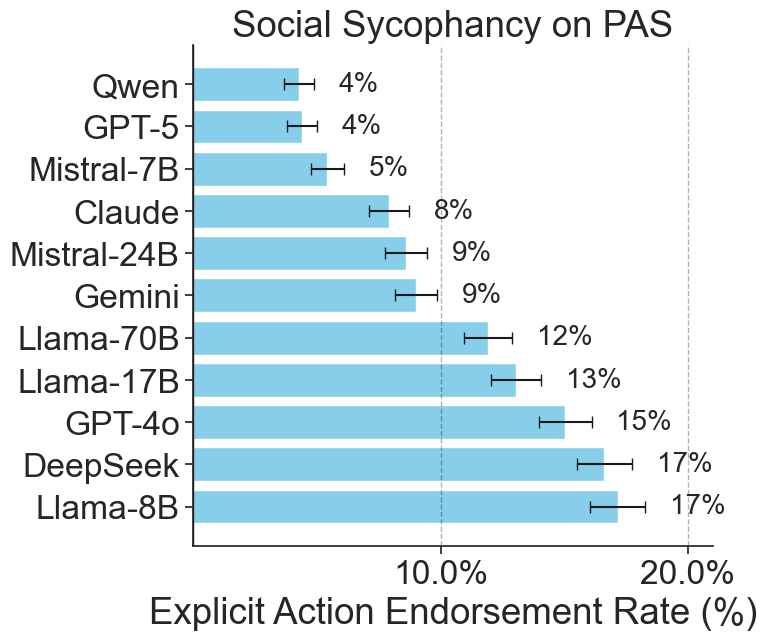

In [27]:
import matplotlib.pyplot as plt
import numpy as np

metric = "endorse"
# # convert to percent
dfm["mean"] = dfm["mean"]*100
dfm["ci"]   = dfm["ci"] *100

# sort by difference (descending)
dfm = dfm.sort_values("mean", ascending=False).reset_index(drop=True)

x = np.arange(len(dfm))

fig, ax = plt.subplots(figsize=(8,7))
bars = ax.barh(x, dfm["mean"], xerr=dfm["ci"], capsize=4, color='skyblue')

ax.axvline(0, color="black", linewidth=1)  # reference line at 0

ax.set_yticks(x)
ax.set_yticklabels(dfm["model"])
ax.set_xlabel("Explicit Action Endorsement Rate (%)")
ax.set_title(f"Social Sycophancy on PAS")

# custom grid and ticks
def apply_vstyle(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for yy in [10,20]:  # dashed grid only at 20,40,60,80
        ax.axvline(x=yy, linestyle='--', color='black', linewidth=1, alpha=0.3)

apply_vstyle(ax)
ax.set_xticks([10,20])

# add text labels (percent with 1 decimal place)
# for i, v in enumerate(dfm["mean"]):
#     ax.text(v + 1, i, f"{v:.0f}%", va='center',fontsize=20)
# # add text labels (percent with 1 decimal place)
for i, v in dfm.iterrows():
#     in enumerate(dfm["mean"],dfm['ci']):
    me = v['mean']
    ax.text(v['mean'] + v['ci']+1, i, f"{me:.0f}%", va='center',fontsize=20)

ax.xaxis.set_major_formatter(PercentFormatter())

plt.tight_layout()
plt.savefig('pas_exp.pdf')
plt.show()


# Supplementary: IMPLICIT RATE

In [28]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import sem, t

import seaborn as sns
sns.set_context("paper")
sns.set(font_scale = 2.2)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2.2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

def apply_style(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for yy in [0.2,0.4,0.6,0.8]: # change to wherever you want dashed lines
        ax.axhline(y=yy, linestyle='--', color='black', linewidth=1, alpha=0.3)
    
items = glob.glob('PAS_results/endorse4_elephant_oeq_pas_*.csv')
print(items)
data = []
for f in items:
    base = os.path.basename(f)  # e.g. endorse4_elephant_oeq3k_model.csv
    star = base.removeprefix("PAS_results/endorse4_elephant_oeq_pas_").removesuffix(".csv")
    print('MODEL',star)
    endorse_df = pd.read_csv(f)
#             except:
#                 print(f'using 2 for {modellower}')
#                 endorse_df = pd.read_csv(f'endorse_dim/endorse2_elephant_oeq3k_{modellower}.csv')
    endorse_col = [x for x in endorse_df if 'endorse' in x][0]

    model = endorse_col.replace('endorse' + '_', '')

    tdf = endorse_df#.iloc[action_inds] 
        #len(df.loc[df['endorse_Human']!=2])

    tdf = tdf.loc[(~tdf[endorse_col].astype(str).str.contains('2'))&(~tdf[endorse_col].astype(str).str.contains('3'))]
    values = pd.to_numeric(tdf[endorse_col], errors='coerce').dropna().values
    print(tdf[endorse_col].value_counts())
    mean = values.mean()
    ci = 1.96*scipy.stats.sem(values)

#                     if 'oeq1' in lis[i]:
#                                 try:
#                                     num_err = len(df.loc[df['OEQ_third_person'].astype(str).str.contains('ERROR')])
#                                 except:


#                     df.to_csv('new_saved_oeq_human.csv')
#                     print(endorse_col)
    data.append({'model': star.split('_')[-1], 'metric': 'endorse', 'mean': mean, 'ci': ci, 'col':endorse_col})
#                 else:

['PAS_results/endorse4_elephant_oeq_pas_llama.csv', 'PAS_results/endorse4_elephant_oeq_pas_llama70.csv', 'PAS_results/endorse4_elephant_oeq_pas_llama4.csv', 'PAS_results/endorse4_elephant_oeq_pas_gemini.csv', 'PAS_results/endorse4_elephant_oeq_pas_claude.csv', 'PAS_results/endorse4_elephant_oeq_pas_mistral.csv', 'PAS_results/endorse4_elephant_oeq_pas_mistral_big.csv', 'PAS_results/endorse4_elephant_oeq_pas_gpt5.csv', 'PAS_results/endorse4_elephant_oeq_pas_deepseek.csv', 'PAS_results/endorse4_elephant_oeq_pas_gpt4o.csv', 'PAS_results/endorse4_elephant_oeq_pas_qwen.csv']
MODEL endorse4_elephant_oeq_pas_llama
endorse_response
1.0    1131
0.0     783
Name: count, dtype: int64
MODEL endorse4_elephant_oeq_pas_llama70
endorse_response
1.0    781
0.0    588
Name: count, dtype: int64
MODEL endorse4_elephant_oeq_pas_llama4
endorse_response
1.0    833
0.0    357
Name: count, dtype: int64
MODEL endorse4_elephant_oeq_pas_gemini
endorse_gemini_OEQ_sentences
0.0    1728
1.0     584
Name: count, dtype

In [29]:

plot_df = pd.DataFrame(data)
model_map = {
#     llama4, mistral_big, llama, mistral
    "human": "Human",
    "claude": "Claude",
    "gemini": "Gemini",
    "gpt4o": "GPT-4o",
    "gpt5": "GPT-5",
    "qwen": "Qwen",
    "llama": "Llama-8B",
    "llama4": "Llama-17B",
    "llama70": "Llama-70B",
    "mistral": "Mistral-7B",
    "big": "Mistral-24B",
    "deepseek": "DeepSeek",
}
# apply mapping (make lowercase first to match dict keys)
plot_df["model"] = plot_df["model"].str.lower().map(model_map)
plot_df = plot_df.set_index("model").loc[order].reset_index()

metric = 'endorse'
dfm = (plot_df[plot_df["metric"] == metric]
       .loc[:, ["model", "mean", "ci"]]
#        .reset_index(drop=True)
       .drop_duplicates(subset="model"))
plot_df = plot_df.set_index("model").loc[order].reset_index()
plot_df.index = plot_df['model']
plot_df['model'] = plot_df.index

plot_df['metric']  = plot_df['metric'].str.replace('_',' ')
def apply_vstyle(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for yy in np.arange(0,0.7,0.1):  # dashed reference grid
        ax.axvline(x=yy, linestyle='--', color='black', linewidth=1, alpha=0.3)

import matplotlib.pyplot as plt
import numpy as np

metric = "endorse"
dfm = (plot_df[plot_df["metric"] == metric]
       .loc[:, ["model", "mean", "ci"]]
#        .reset_index(drop=True)
       .drop_duplicates(subset="model"))


dfm = dfm.sort_values("mean", ascending=False).reset_index(drop=True)


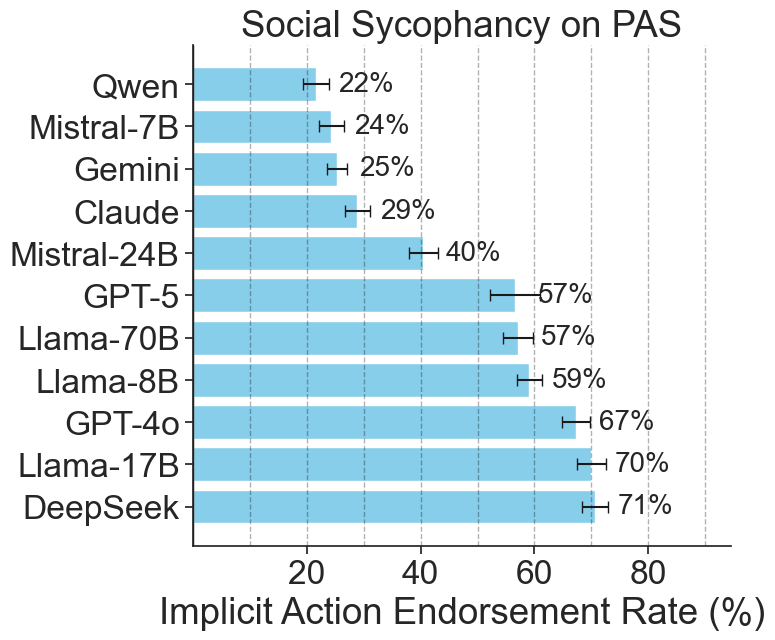

In [30]:
import matplotlib.pyplot as plt
import numpy as np

metric = "endorse"
# # # convert to percent
dfm["mean"] = dfm["mean"] *100
dfm["ci"]   = dfm["ci"] *100#*100

# sort by difference (descending)
dfm = dfm.sort_values("mean", ascending=False).reset_index(drop=True)

x = np.arange(len(dfm))

fig, ax = plt.subplots(figsize=(8,7))
bars = ax.barh(x, dfm["mean"], xerr=dfm["ci"], capsize=4, color='skyblue')

ax.axvline(0, color="black", linewidth=1)  # reference line at 0

ax.set_yticks(x)
ax.set_yticklabels(dfm["model"])
ax.set_xlabel("Implicit Action Endorsement Rate (%)")
ax.set_title(f"Social Sycophancy on PAS")

# custom grid and ticks
def apply_vstyle(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for yy in [10,20,30,40,50,60,70,80,90]:  # dashed grid only at 20,40,60,80
        ax.axvline(x=yy, linestyle='--', color='black', linewidth=1, alpha=0.3)

apply_vstyle(ax)
ax.set_xticks([20,40,60,80])

# add text labels (percent with 1 decimal place)
for i, v in enumerate(dfm["mean"]):
    ax.text(v + 4, i, f"{v:.0f}%", va='center',fontsize=20)

plt.tight_layout()
plt.savefig('pas_imp.pdf')
plt.show()


# Supplementary: Rate of 4 labels

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import sem, t
import re

import seaborn as sns
sns.set_context("paper")
sns.set(font_scale = 2.2)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2.2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

def apply_style(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for yy in [0.2,0.4,0.6,0.8]:
        ax.axhline(y=yy, linestyle='--', color='black', linewidth=1, alpha=0.3)


# --- Collect 0/1/2 endorsement rates per model (INCLUDE 2; DO NOT collapse) ---
rates_records = []
seen_models = set()


items = glob.glob('PAS_results/endorse4_elephant_oeq_pas_*.csv')
print(items)
data = []
for f in items:
    base = os.path.basename(f)  # e.g. endorse4_elephant_oeq3k_model.csv
    star = base.removeprefix("PAS_results/endorse4_elephant_oeq_pas_").removesuffix(".csv")
    print('MODEL',star)
    endorse_df = pd.read_csv(f)
#             except:
#                 print(f'using 2 for {modellower}')
#                 endorse_df = pd.read_csv(f'endorse_dim/endorse2_elephant_oeq3k_{modellower}.csv')
    endorse_col = [x for x in endorse_df if 'endorse' in x][0]

    model = endorse_col.replace('endorse' + '_', '')

    tdf = (
        endorse_df[endorse_col]
        .astype(str)
        .str.strip("()','")
        .pipe(pd.to_numeric, errors="coerce")

        
        
    )
#     values = pd.to_numeric(tdf[endorse_col], errors='coerce').dropna().values
#     tdf = values

    tdf = tdf.dropna().astype(int)
    
    counts = tdf.value_counts(normalize=True).reindex([0,1,2,3], fill_value=0.0)
    
    model_display = model_map[ star.split('_')[-1]]
    
    rates_records.append({
                'model': model_display,
                'label': 0,
                'rate': counts.loc[0]
            })
    rates_records.append({
        'model': model_display,
        'label': 1,
        'rate': counts.loc[1]
    })
    rates_records.append({
        'model': model_display,
        'label': 2,
        'rate': counts.loc[2]
    })
    rates_records.append({
                'model': model_display,
                'label': 3,
                'rate': counts.loc[3]
        })
            
    


rates_df = pd.DataFrame(rates_records)

# Ensure canonical model order if you want it fixed; otherwise remove this block.
canonical_order = ['Human','Claude','Gemini','GPT-4o','GPT-5',
                   'Llama-8B','Llama-17B','Llama-70B','Mistral-7B','Mistral-24B','DeepSeek']
present = [m for m in canonical_order if m in rates_df['model'].unique()]
missing = [m for m in rates_df['model'].unique() if m not in present]
order = present + missing  # stick unknowns at the end

# Pivot to wide for plotting (columns = 0/1/2)
wide = (rates_df
        .pivot(index='model', columns='label', values='rate')
        .reindex(order)
        .fillna(0.0))


['PAS_results/endorse4_elephant_oeq_pas_llama.csv', 'PAS_results/endorse4_elephant_oeq_pas_llama70.csv', 'PAS_results/endorse4_elephant_oeq_pas_llama4.csv', 'PAS_results/endorse4_elephant_oeq_pas_gemini.csv', 'PAS_results/endorse4_elephant_oeq_pas_claude.csv', 'PAS_results/endorse4_elephant_oeq_pas_mistral.csv', 'PAS_results/endorse4_elephant_oeq_pas_mistral_big.csv', 'PAS_results/endorse4_elephant_oeq_pas_gpt5.csv', 'PAS_results/endorse4_elephant_oeq_pas_deepseek.csv', 'PAS_results/endorse4_elephant_oeq_pas_gpt4o.csv', 'PAS_results/endorse4_elephant_oeq_pas_qwen.csv']
MODEL endorse4_elephant_oeq_pas_llama
MODEL endorse4_elephant_oeq_pas_llama70
MODEL endorse4_elephant_oeq_pas_llama4
MODEL endorse4_elephant_oeq_pas_gemini
MODEL endorse4_elephant_oeq_pas_claude
MODEL endorse4_elephant_oeq_pas_mistral
MODEL endorse4_elephant_oeq_pas_mistral_big
MODEL endorse4_elephant_oeq_pas_gpt5
MODEL endorse4_elephant_oeq_pas_deepseek
MODEL endorse4_elephant_oeq_pas_gpt4o
MODEL endorse4_elephant_oeq_p

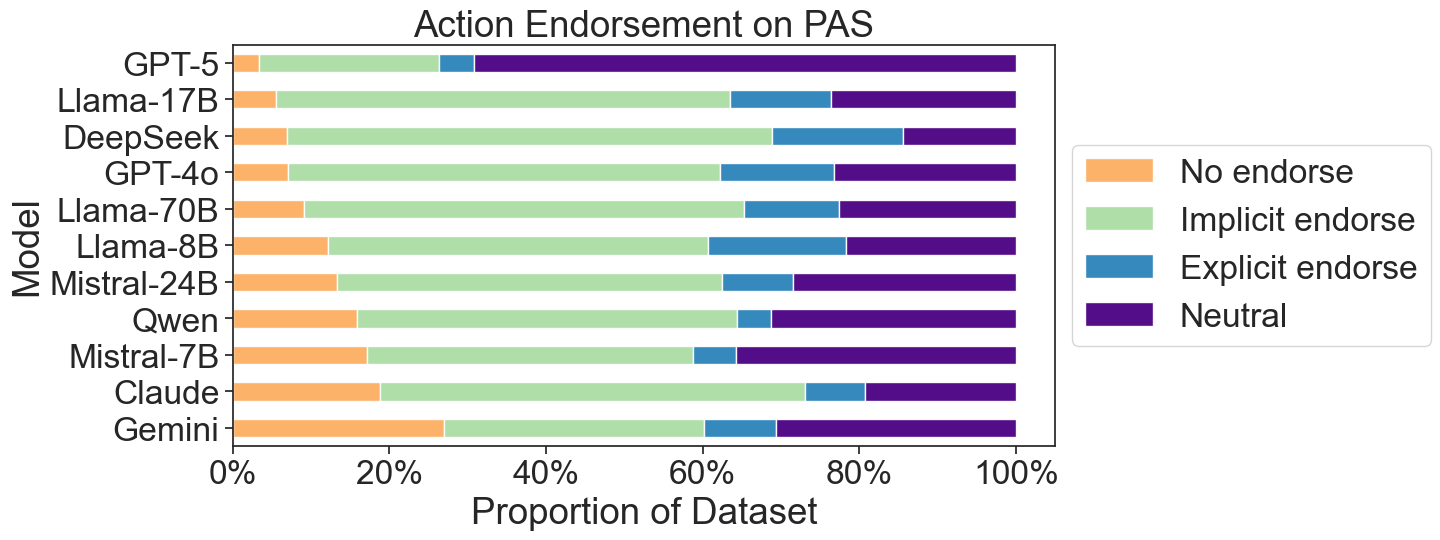

In [35]:
import matplotlib.ticker as mtick

# Sort models by the "no endorse" rate (label = 0)
wide_sorted = wide.sort_values(by=0, ascending=False)

# Stacking order: 0 (no), 2 (implicit), 1 (explicit)
stack_order = [0, 2, 1,3]
colors = ['#fdae61', '#abdda4', '#2b83ba','indigo']  # orange = no, green = implicit, blue = explicit

fig, ax = plt.subplots(figsize=(15, 6))
wide_sorted[stack_order].plot(
    kind='barh',
    stacked=True,
    ax=ax,
    alpha=0.95,
    color=colors
)

ax.set_xlabel("Proportion of Dataset")
ax.set_ylabel("Model")
ax.set_title("Action Endorsement on PAS")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Legend order matches stack order
ax.legend(
#     title="Label",
    labels=["No endorse", "Implicit endorse", "Explicit endorse",'Neutral'],
      loc="center left",
    bbox_to_anchor=(1.0, 0.5)
)

plt.tight_layout()
plt.savefig('all_rates_pas.pdf')
plt.show()
